# Traffic Sign Classifier

This jupyter notebook loads an image and classifies the traffic sign on it.

Handling imports:

In [1]:
import numpy as np
np.random.seed(1337) # for reproducibility

from keras.models import load_model
from keras.preprocessing import image

from skimage import io, transform, color, exposure
import matplotlib.pyplot as plt
%matplotlib inline

Using TensorFlow backend.


In [2]:
# input image resized dimensions
img_rows, img_cols = 32, 32

Making the images more uniform by preprocessing them:

In [3]:
# equalize histogram of each color channel
def equalize_hist(img):
    for k in range(3):
        img[:,:,k] = exposure.equalize_hist(img[:,:,k])
    return img

# stretch contrast of each color channel
def contrast_stretch(img):
    p2, p98 = np.percentile(img, (2, 98))
    for k in range(3):
        img[:,:,k] = exposure.rescale_intensity(img[:,:,k], in_range=(p2, p98))
    return img

def process_img(img):
    img = transform.resize(img, (img_rows, img_cols), mode='constant')
    img = contrast_stretch(img)
    #img = equalize_hist(img)
    return img

Loads the trained model from the disk:

In [4]:
model = load_model('final_model.h5')

/usr/local/anaconda3/envs/ml/lib/python3.5/site-packages/keras/models.py:288: UserWarning: Error in loading the saved optimizer state. As a result, your model is starting with a freshly initialized optimizer.
  warnings.warn('Error in loading the saved optimizer '


Loads the cropped image, processes and classifies it. Please specify the path for your image below:

Best classification:
Class: 16 , Probability: 1.0


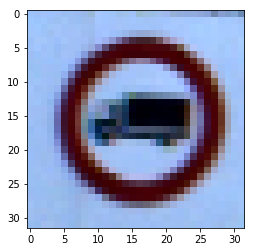

In [7]:
# PATH TO IMAGE
img = io.imread('GTSRB/Final_Test/Images/00000.ppm')

img = process_img(img)
plt.imshow(img)

img = image.img_to_array(img)
img = np.expand_dims(img, axis=0)

preds = model.predict(img)

prob = max(preds[0])
index = np.where(preds[0] == prob)[0][0]

print('Best classification:')
print('Class:', index, ', Probability:', prob)